# Simplifying the radial equation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_bvp,quad

In [2]:
def glrho(kappa,n,a,b):
  nodes=5
  def dY(x,Y): # Y=[f,df,a,b=da]
    f,df,rhoa,b = Y # rhoa'=rhob,b'=f**2*(rhoa+n/kappa)/rho
    rhoank=rhoa+n/kappa
    ank=rhoank/x
    return np.vstack((df, kappa*kappa*f*(f**2+ank**2-1)-df/x,x*b,ank*f**2))
  def bc(Ya, Yb):
    return np.array([Ya[0], Yb[0]-1, Ya[2],Yb[3]])
  rng=[a, b]
  x = np.linspace(*rng, nodes)
  Y = np.zeros((4, x.size))
  for k in range(x.size): # initialize f to 1
    Y[0,k]=1
  return solve_bvp(dY, bc, x, Y)

def glrplot(kappa,n,a,b,tex):
  sol=glrho(kappa,n,a,b)
  r_plot = np.linspace(a,b, 40)
  plots=sol.sol(r_plot)
  f=plots[0] # f
  plt.subplot(1, 2, 1)
  plt.plot(r_plot, f,label=f"$f: {tex}$")
  plt.subplot(1, 2, 2)
  b = plots[3] # b=da+a/x
  plt.plot(r_plot, b,label=f"$b: {tex}$")
  return 0

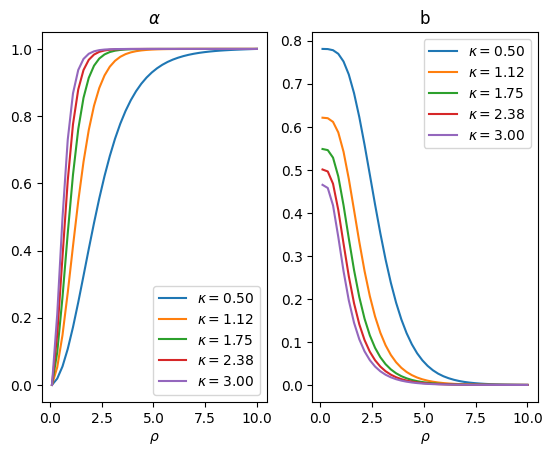

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle(f'$\\kappa={kappa}$')
ax1.set_xlabel('$\\rho$')
ax1.set_title("$\\alpha$")
ax2.set_xlabel('$\\rho$')
ax2.set_title('b')

n=-2 # -1 give positive b field
a,b=0.1,10
for kappa in np.linspace(0.5,3,5):
  sol=glrho(kappa,n,a,b)
  R=np.linspace(sol.x[0],sol.x[-1],40)
  S=sol.sol(R)
  ax1.plot(R, S[0],label=f"$\\kappa={kappa:.2f}$")  
  ax2.plot(R, S[3],label=f"$\\kappa={kappa:.2f}$")
  #plt.subplots_adjust(left=-0.1,right=0.9)
ax1.legend()
ax2.legend()
plt.show()

1.983140188887507


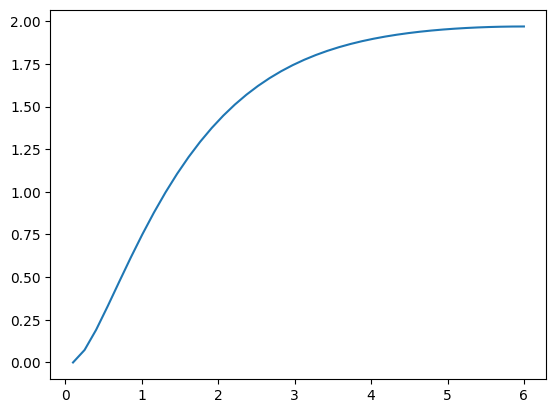

In [4]:
kappa=10
n=-2 # negative value gives positive b field
a,b=0.1,6
sol=glrho(kappa,n,a,b)
R=np.linspace(sol.x[0],sol.x[-1],40)
MN=kappa*sol.sol(R)[2] # should approach -n
plt.plot(R,MN)

# sanity integrate rho*b to give -n
def rhob(rho):
  return sol.sol(rho)[3]*rho

int=quad(rhob,0,6)
print(int[0]*kappa)

In [5]:
#dG/drho
n=-2 # -1 give positive b field
a,b=0.1,8
kappa=.75
sol=glrho(kappa,-1,a,b)

def dGdrho(sol):
  def dg(rho):
    alpha,dalpha,rhoa,b=sol.sol(rho)
    return rho*(-alpha**4/2+b**2+1/2)
  return dg
R=np.linspace(sol.x[0],sol.x[-1],80)
S=sol.sol(R)
E1=R*(-S[0]**4/2+S[3]**2+1/2)
G1=quad(dGdrho(sol),a,b)
print("n=1:",G1)
sol=glrho(kappa,-2,a,b)
R=np.linspace(sol.x[0],sol.x[-1],80)
S=sol.sol(R)
E2=R*(-S[0]**4/2+S[3]**2+1/2)
G2=quad(dGdrho(sol),a,b)
print("n=2:",G2)
print(G2[0]/G1[0])

n=1: (1.8303552466699093, 2.540659131914744e-08)
n=2: (3.655923236492618, 4.32868301468543e-08)
1.9973845203788114


At $\kappa$ around 0.7 the extra energy required to create 2 flux quanta as two single-quantum vortices is about the same as a single vortex containing 2 quanta. Above this value single-quantum vortices are favoured over the flux clumping together. This enables type-II superconductivity.

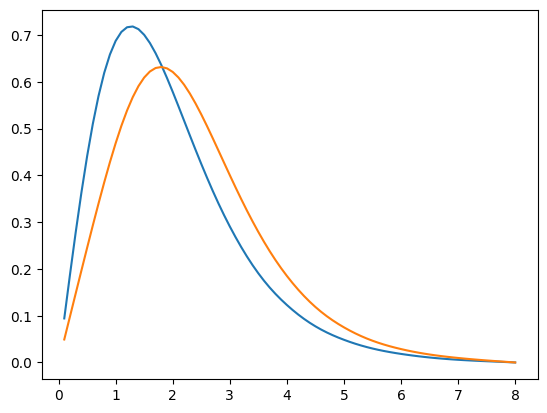

In [6]:
plt.plot(R,E1)
plt.plot(R,E2/2)
plt.show()